In [166]:
!pip install tqdm scikit-image scikit-learn scipy

In [167]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from scipy.stats import pearsonr

In [168]:
# Define dataset paths
dataset_path = "../Dataset/neutral"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

# Define noisy dataset paths
noisy_dataset_path = "../Dataset/neutral/noisy"
noisy_train_path = os.path.join(noisy_dataset_path, "train")
noisy_test_path = os.path.join(noisy_dataset_path, "test")

# Ensure noisy dataset directories exist
for path in [noisy_train_path, noisy_test_path]:
    if not os.path.exists(path):
        os.makedirs(path)

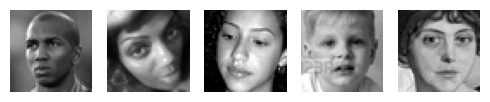

In [169]:
def display_sample_images(folder_path, num_images=5):
    categories = os.listdir(folder_path)
    fig, axes = plt.subplots(1, num_images, figsize=(5, 5))

    # for i, category in enumerate(categories):
    #     category_path = os.path.join(folder_path, category)
    #     image_files = os.listdir(category_path)[:num_images]

    #     for j, image_file in enumerate(image_files):
    #         img_path = os.path.join(category_path, image_file)
    #         img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
    #         img = cv2.resize(img, (48, 48)) 

    #         axes[i, j].imshow(img, cmap='gray')
    #         axes[i, j].axis("off")

    #     axes[i, 0].set_ylabel(category, fontsize=12)

    category_path = folder_path
    image_files = os.listdir(category_path)[:num_images]

    for j, image_file in enumerate(image_files):
        img_path = os.path.join(category_path, image_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (48, 48)) 
        
        axes[j].imshow(img, cmap='gray')
        axes[j].axis("off")

    axes[0].set_ylabel("neutral", fontsize=12)

    plt.tight_layout()
    plt.show()

display_sample_images(train_path, num_images=5)


In [170]:
# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, std=0.07):  
    noise = np.random.normal(mean, std, image.shape) 
    
    #noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = 255*(image + noise) # Add noise to the image
    return noisy_image

# Function to process images and save noisy versions
def process_images(input_folder, output_folder, category=""):
    category_path = input_folder
    noisy_category_path = os.path.join(output_folder, category)

    # Ensure category subfolder exists in noisy images
    if not os.path.exists(noisy_category_path):
        os.makedirs(noisy_category_path)

    # Process images inside category folder
    image=""
    for img_name in tqdm(os.listdir(category_path), desc=f"Processing {category} in {output_folder}"):
        img_path = os.path.join(category_path, img_name)
        noisy_img_path = os.path.join(noisy_category_path, img_name)

        # Read and process image
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            continue  # Skip unreadable images
    
        image = image/255;  
        noisy_image = add_gaussian_noise(image)

        # Save noisy image
        cv2.imwrite(noisy_img_path, noisy_image)
    print(image)
    print(noisy_image)
# Apply noise to both train and test datasets for neutral category
process_images(train_path, noisy_train_path, category="")
process_images(test_path, noisy_test_path, category="")

print("✅ Noisy images successfully generated and saved in 'FER2013_Noisy_Images' folder.")

Processing  in ../Dataset/neutral/noisy/train: 100%|██████████| 106/106 [00:00<00:00, 3111.98it/s]


[[0.54509804 0.54509804 0.54901961 ... 0.53333333 0.5254902  0.5372549 ]
 [0.55294118 0.54117647 0.56470588 ... 0.54117647 0.5372549  0.52941176]
 [0.55686275 0.55686275 0.54509804 ... 0.52941176 0.5254902  0.5372549 ]
 ...
 [0.58823529 0.56470588 0.55686275 ... 0.5254902  0.54117647 0.57647059]
 [0.58431373 0.57647059 0.55686275 ... 0.54509804 0.56078431 0.57254902]
 [0.59215686 0.58431373 0.56470588 ... 0.4627451  0.56862745 0.57254902]]
[[135.20230701 138.23714025 137.14805194 ... 158.38928011 141.95656479
   91.82032447]
 [154.09185302 111.38503064 147.25450663 ... 134.98077772 138.85735608
  157.61046054]
 [123.7483451  137.50120819 137.05761662 ... 151.99291925 124.42945232
  122.26864466]
 ...
 [148.06053389 125.17581852 117.81079833 ... 100.89685951 122.19564952
  129.7103516 ]
 [161.81082523 116.75753775 141.00103115 ... 155.18877225 125.89076744
  145.55256029]
 [156.33738094 174.99979905 155.0522702  ...  92.30223072 114.8090364
  162.24028525]]


Processing  in ../Dataset/neutral/noisy/test: 100%|██████████| 15/15 [00:00<00:00, 5201.70it/s]

[[0.18039216 0.19215686 0.19607843 ... 0.43137255 0.40784314 0.41960784]
 [0.18823529 0.19607843 0.2        ... 0.42745098 0.43529412 0.41960784]
 [0.20392157 0.20784314 0.22352941 ... 0.43529412 0.43137255 0.44313725]
 ...
 [0.45882353 0.51372549 0.61960784 ... 0.42352941 0.5372549  0.40784314]
 [0.44313725 0.5372549  0.59607843 ... 0.4        0.56470588 0.44705882]
 [0.45882353 0.56470588 0.61960784 ... 0.34509804 0.54509804 0.5254902 ]]
[[ 45.30125942  44.91588695  42.14669155 ... 106.51568619 118.86754668
  128.58571272]
 [ 37.37560192  34.62506001  66.49292436 ... 106.05687819  65.90858543
  113.12060397]
 [ 82.69139974  65.16723813  72.5567549  ... 121.90663161 109.25494733
  123.87119547]
 ...
 [ 97.66749421 119.37655804 151.92942121 ... 106.1019353  157.43387985
  116.98058302]
 [129.63842764 147.06666477 157.22211785 ...  97.55178717 120.42381281
  106.55909005]
 [128.90852284 144.19390271 167.64178643 ...  82.46339858 136.76528981
  144.54739508]]
✅ Noisy images successfully 

In [171]:
# import numpy as np

# def image_to_fft(image):
#     fft_transformed = np.fft.fft2(image)
#     fft_shifted = np.fft.fftshift(fft_transformed)

#     magnitude = np.log1p(np.abs(fft_shifted))  # Log transformation for stability
#     phase = np.angle(fft_shifted)  # Extract phase
    
#     return magnitude, phase  # Return separately, NOT stacked!


# def fft_to_image(magnitude, phase):
#     magnitude = np.expm1(magnitude)  # Undo log transformation

#     fft_reconstructed = np.fft.ifftshift(magnitude * np.exp(1j * phase))
#     image_reconstructed = np.fft.ifft2(fft_reconstructed)

#     image_reconstructed = np.real(image_reconstructed)  # Ensure output is real-valued

#     # Normalize to [0, 255]
#     #image_reconstructed = image_reconstructed - image_reconstructed.min()  # Shift to 0
#     #image_reconstructed = image_reconstructed / image_reconstructed.max()  # Scale to [0, 1]
#     #image_reconstructed = (image_reconstructed * 255).astype(np.uint8)  # Scale to [0, 255]
#     return image_reconstructed

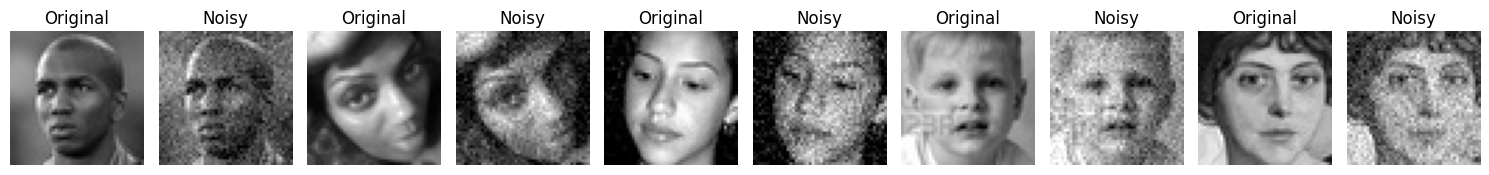

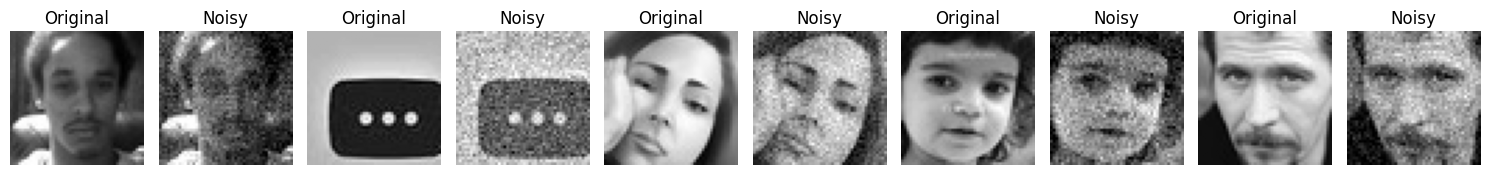

In [172]:
def display_original_and_noisy_images(original_folder, noisy_folder, num_images=5, category=""):
    original_category_path = os.path.join(original_folder, category)
    noisy_category_path = os.path.join(noisy_folder, category)

    if not os.path.exists(noisy_category_path):
        print(f"Skipping {category}, noisy folder not found.")
        return

    fig, axes = plt.subplots(1, num_images * 2, figsize=(15, 5))

    image_files = os.listdir(original_category_path)[:num_images]

    for j, image_file in enumerate(image_files):
        original_img_path = os.path.join(original_category_path, image_file)
        noisy_img_path = os.path.join(noisy_category_path, image_file)

        original_img = cv2.imread(original_img_path, cv2.IMREAD_GRAYSCALE)
        noisy_img = cv2.imread(noisy_img_path, cv2.IMREAD_GRAYSCALE)

        if original_img is None or noisy_img is None:
            continue  # Skip if images are unreadable

        original_img = cv2.resize(original_img, (48, 48))
        noisy_img = cv2.resize(noisy_img, (48, 48))

        # Show original image
        axes[j * 2].imshow(original_img, cmap='gray')
        axes[j * 2].axis("off")
        axes[j * 2].set_title("Original")

        # Show noisy image
        axes[j * 2 + 1].imshow(noisy_img, cmap='gray')
        axes[j * 2 + 1].axis("off")
        axes[j * 2 + 1].set_title("Noisy")

    plt.tight_layout()
    plt.show()

# Display original and noisy images for neutral category
display_original_and_noisy_images(train_path, noisy_train_path, num_images=5, category="")
display_original_and_noisy_images(test_path, noisy_test_path, num_images=5, category="")

In [154]:
def load_images(folder_path, category="", image_size=(48, 48)):
    data = []
    category_path = os.path.join(folder_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, image_size)
        data.append(img)
    return np.array(data).astype("float32") / 255.0  # Normalize images

# Load noisy and clean images for the "neutral" category
X_noisy = load_images(noisy_train_path, category="")
X_clean = load_images(train_path, category="")

print("Images Loaded successfully!")

Images Loaded successfully!


In [173]:
# Convert to arrays (in case they're still Python lists)
X_noisy = np.array(X_noisy).astype('float32')
X_clean = np.array(X_clean).astype('float32')

# Check lengths and match them
min_len = min(len(X_noisy), len(X_clean))
X_noisy = X_noisy[:min_len]
X_clean = X_clean[:min_len]

# Add channel dimension (shape becomes N x 48 x 48 x 1)
X_noisy = X_noisy[..., np.newaxis]
X_clean = X_clean[..., np.newaxis]

# Debug: print final shapes
print("✅ X_noisy shape:", X_noisy.shape)
print("✅ X_clean shape:", X_clean.shape)

✅ X_noisy shape: (106, 48, 48, 1, 1)
✅ X_clean shape: (106, 48, 48, 1, 1)


In [174]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [156]:
# #Experiment 1
# def build_unet(input_shape=(48, 48, 1)):
#     inputs = Input(shape=input_shape)

#     # Encoder
#     c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
#     p1 = MaxPooling2D((2, 2))(c1)

#     c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
#     p2 = MaxPooling2D((2, 2))(c2)

#     c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
#     p3 = MaxPooling2D((2, 2))(c3)

#     # Added deeper level
#     c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(p3)

#     # Decoder
#     u1 = UpSampling2D((2, 2))(c4)
#     concat1 = Concatenate()([u1, c3]) # Skip connection
#     c5 = Conv2D(128, (3, 3), activation='relu', padding='same')(concat1)

#     u2 = UpSampling2D((2, 2))(c5)
#     concat2 = Concatenate()([u2, c2]) # Skip connection
#     c6 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat2)

#     u3 = UpSampling2D((2, 2))(c6)
#     concat3 = Concatenate()([u3, c1]) #Skip connection
#     c7 = Conv2D(32, (3, 3), activation='relu', padding='same')(concat3)

#     outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

#     model = Model(inputs, outputs)
#     return model

In [175]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.models import Model

def conv_block(x, filters):
    x = Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    return x

def build_unet_optimized(input_shape=(48, 48, 1)):
    inputs = Input(shape=input_shape)

    # Encoder
    c1 = conv_block(inputs, 32)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = conv_block(p1, 64)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = conv_block(p2, 128)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = conv_block(p3, 256)
    c4 = Dropout(0.1)(c4)  # Small dropout for regularization

    # Decoder
    u1 = UpSampling2D((2, 2))(c4)
    concat1 = Concatenate()([u1, c3])
    c5 = conv_block(concat1, 128)

    u2 = UpSampling2D((2, 2))(c5)
    concat2 = Concatenate()([u2, c2])
    c6 = conv_block(concat2, 64)

    u3 = UpSampling2D((2, 2))(c6)
    concat3 = Concatenate()([u3, c1])
    c7 = conv_block(concat3, 32)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs, outputs)
    return model


In [176]:
from tensorflow.keras.optimizers import Adam

unet = build_unet_optimized()
unet.compile(optimizer=Adam(learning_rate=1e-3), loss='mae', metrics=['mae'])


In [177]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_unet_model_optimized.h5", save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

history = unet.fit(X_noisy, X_clean,
                   epochs=100,
                   batch_size=32,
                   validation_split=0.1,
                   callbacks=callbacks)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.2932 - mae: 0.2932

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - loss: 0.2780 - mae: 0.2780 - val_loss: 0.2372 - val_mae: 0.2372 - learning_rate: 0.0010
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.1185 - mae: 0.1185

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - loss: 0.1158 - mae: 0.1158 - val_loss: 0.2343 - val_mae: 0.2343 - learning_rate: 0.0010
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.0729 - mae: 0.0729

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - loss: 0.0719 - mae: 0.0719 - val_loss: 0.2331 - val_mae: 0.2331 - learning_rate: 0.0010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.0547 - mae: 0.0547 - val_loss: 0.2334 - val_mae: 0.2334 - learning_rate: 0.0010
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.0525 - mae: 0.0525

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 0.0520 - mae: 0.0520 - val_loss: 0.2301 - val_mae: 0.2301 - learning_rate: 0.0010
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 0.0462 - mae: 0.0462

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - loss: 0.0461 - mae: 0.0461 - val_loss: 0.2266 - val_mae: 0.2266 - learning_rate: 0.0010
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.0448 - mae: 0.0448 - val_loss: 0.2276 - val_mae: 0.2276 - learning_rate: 0.0010
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.0414 - mae: 0.0414 - val_loss: 0.2300 - val_mae: 0.2300 - learning_rate: 0.0010
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 0.0433 - mae: 0.0433
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 0.0437 - mae: 0.0437 - val_loss: 0.2375 - val_mae: 0.2375 - learning_rate: 0.0010
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - loss: 0.0383 - mae: 0.0383 - val_loss: 0.2408 - val_mae: 0.2408 - learning_rate: 5.0000e-04
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 0.0423 - mae: 0.0423 - val_loss: 0.2431 - val_mae: 0.2431 - learning_rate: 5.0000e-04
Epoch 12/100

In [178]:
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization
# from tensorflow.keras.models import Model

# def conv_block(x, filters):
#     x = Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
#     x = BatchNormalization()(x)
#     x = Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
#     x = BatchNormalization()(x)
#     return x

# def build_unet(input_shape=(48, 48, 1)):
#     inputs = Input(shape=input_shape)

#     # Encoder
#     c1 = conv_block(inputs, 32)
#     p1 = MaxPooling2D((2, 2))(c1)

#     c2 = conv_block(p1, 64)
#     p2 = MaxPooling2D((2, 2))(c2)

    # c3 = conv_block(p2, 128)
    # p3 = MaxPooling2D((2, 2))(c3)

    # c4 = conv_block(p3, 256)
    # p4 = MaxPooling2D((2, 2))(c4)

    # # New deeper layer
    # c5 = conv_block(p4, 512)

    # # Decoder
    # u1 = UpSampling2D((2, 2))(c5)
    # concat1 = Concatenate()([u1, c4])
    # c6 = conv_block(concat1, 256)

    # u2 = UpSampling2D((2, 2))(c6)
    # concat2 = Concatenate()([u2, c3])
    # c7 = conv_block(concat2, 128)

    # u3 = UpSampling2D((2, 2))(c7)
    # concat3 = Concatenate()([u3, c2])
    # c8 = conv_block(concat3, 64)

    # u4 = UpSampling2D((2, 2))(c8)
    # concat4 = Concatenate()([u4, c1])
    # c9 = conv_block(concat4, 32)

    # outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    # model = Model(inputs, outputs)
    # return model


In [163]:
# Experiment 3
# def conv_block(x, filters):
#     x = Conv2D(filters, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
#     x = BatchNormalization()(x)
#     x = Conv2D(filters, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
#     x = BatchNormalization()(x)
#     return x

# def build_unet_fixed(input_shape=(48, 48, 1)):
#     inputs = Input(shape=input_shape)

#     # Encoder
#     c1 = conv_block(inputs, 32)
#     p1 = MaxPooling2D((2, 2))(c1)

#     c2 = conv_block(p1, 64)
#     p2 = MaxPooling2D((2, 2))(c2)

#     c3 = conv_block(p2, 128)
#     p3 = MaxPooling2D((2, 2))(c3)

#     c4 = conv_block(p3, 256)
#     p4 = MaxPooling2D((2, 2))(c4)

#     # Bottleneck
#     c5 = conv_block(p4, 512)

#     # Decoder
#     u1 = UpSampling2D((2, 2))(c5)
#     concat1 = Concatenate()([u1, c4])
#     c6 = conv_block(concat1, 256)

#     u2 = UpSampling2D((2, 2))(c6)
#     concat2 = Concatenate()([u2, c3])
#     c7 = conv_block(concat2, 128)

#     u3 = UpSampling2D((2, 2))(c7)
#     concat3 = Concatenate()([u3, c2])
#     c8 = conv_block(concat3, 64)

#     u4 = UpSampling2D((2, 2))(c8)
#     concat4 = Concatenate()([u4, c1])
#     c9 = conv_block(concat4, 32)

#     outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

#     model = Model(inputs, outputs)
#     return model


In [179]:
# unet = build_unet_fixed(input_shape=(48, 48, 1))
# unet.compile(optimizer=Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

# history = unet.fit(
#     X_noisy, X_clean,
#     epochs=100,
#     batch_size=32,
#     validation_split=0.1,
#     callbacks=callbacks
# )

In [180]:
# unet = build_unet()
# unet.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
# unet.summary()

In [181]:
# history = unet.fit(X_noisy[..., np.newaxis], X_clean[..., np.newaxis],
#                    epochs=50, batch_size=32, validation_split=0.1)

In [182]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# callbacks = [
#     EarlyStopping(patience=5, restore_best_weights=True),
#     ModelCheckpoint("best_unet_model.h5", save_best_only=True)
# ]

# history = unet.fit(X_noisy[..., np.newaxis], X_clean[..., np.newaxis],
#                    epochs=50, batch_size=32, validation_split=0.1,
#                    callbacks=callbacks)

In [183]:
import cv2
import numpy as np

def load_images(folder_path, category="", image_size=(48, 48)):
    data = []
    category_path = os.path.join(folder_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, image_size)
        data.append(img)
    return np.array(data).astype("float32") / 255.0  # Normalize to [0, 1]

# Load the test images
X_noisy_test = load_images(noisy_test_path)
X_clean_test = load_images(test_path)


In [184]:
X_noisy_test = X_noisy_test[..., np.newaxis]
X_clean_test = X_clean_test[..., np.newaxis]


In [185]:
unet_preds = unet.predict(X_noisy_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


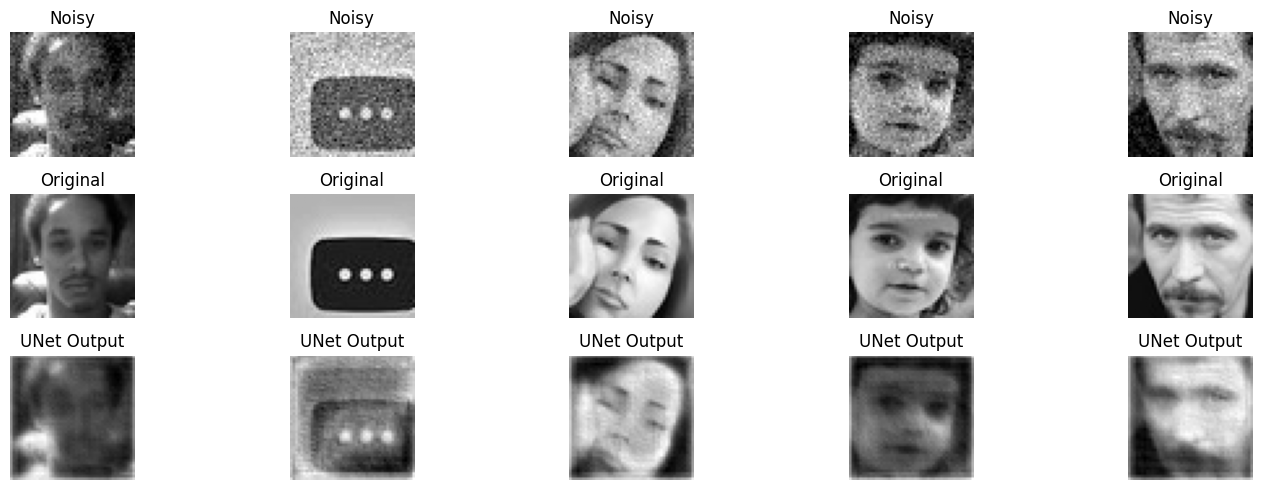

In [186]:
import matplotlib.pyplot as plt

def show_predictions(noisy_imgs, clean_imgs, predicted_imgs, num=5):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        # Noisy input
        plt.subplot(3, num, i + 1)
        plt.imshow(noisy_imgs[i].squeeze(), cmap='gray')
        plt.title("Noisy")
        plt.axis("off")

        # Ground truth
        plt.subplot(3, num, i + 1 + num)
        plt.imshow(clean_imgs[i].squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Predicted
        plt.subplot(3, num, i + 1 + 2 * num)
        plt.imshow(predicted_imgs[i].squeeze(), cmap='gray')
        plt.title("UNet Output")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

show_predictions(X_noisy_test, X_clean_test, unet_preds, num=5)


In [187]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

def calculate_mmse(a, b):
    a = np.asarray(a)
    b = np.asarray(b)
    return np.mean((a - b) ** 2)

psnr_values = []
ssim_values = []
npsnr_values = []
nssim_values = []
mmse_values = []
nmmse_values = []

for i in range(len(X_clean_test)):
    clean = X_clean_test[i].squeeze()
    pred = unet_preds[i].squeeze()
    noisy = X_noisy_test[i].squeeze()

    # Calculate PSNR, SSIM and MMSE for clean vs predicted
    psnr_values.append(psnr(clean, pred, data_range=1.0))
    ssim_values.append(ssim(clean, pred, data_range=1.0))
    mmse_values.append(calculate_mmse(clean, pred))

    # Calculate PSNR ,SSIM and MMSE for noisy vs predicted
    npsnr_values.append(psnr(noisy, pred, data_range=1.0))
    nssim_values.append(ssim(noisy, pred, data_range=1.0))
    nmmse_values.append(calculate_mmse(noisy, pred))

print("🔎 Average PSNR (clean vs pred):", np.mean(psnr_values))
print("🔎 Average SSIM (clean vs pred):", np.mean(ssim_values))
print("🔎 Average MMSE (clean vs pred):", np.mean(mmse_values))
print("🔎 Average PSNR (noisy vs pred):", np.mean(npsnr_values))
print("🔎 Average SSIM (noisy vs pred):", np.mean(nssim_values))
print("🔎 Average MMSE (noisy vs pred):", np.mean(nmmse_values))

🔎 Average PSNR (clean vs pred): 14.288288268047236
🔎 Average SSIM (clean vs pred): 0.26006398024355576
🔎 Average MMSE (clean vs pred): 0.039878793
🔎 Average PSNR (noisy vs pred): 13.78897100353468
🔎 Average SSIM (noisy vs pred): 0.14536771009209265
🔎 Average MMSE (noisy vs pred): 0.044017807


In [144]:
##Experiment 1
# Average PSNR (clean vs pred): 27.433594193672967
# Average SSIM (clean vs pred): 0.870177905619122
# Average MMSE (clean vs pred): 0.0018249655
# Average PSNR (noisy vs pred): 25.0914686416673
# Average SSIM (noisy vs pred): 0.8489836098092662
# Average MMSE (noisy vs pred): 0.0031107569

In [145]:
##Experiment 2
#Average PSNR (clean vs pred): 16.40773864012636
#Average SSIM (clean vs pred): 0.478937890986755
#Average MMSE (clean vs pred): 0.02403047
#Average PSNR (noisy vs pred): 15.628288788831128
#Average SSIM (noisy vs pred): 0.3116725300140932
#Average MMSE (noisy vs pred): 0.028255342

In [146]:
# ##Experiment 3
# Average PSNR (clean vs pred): 16.40773864012636
# Average SSIM (clean vs pred): 0.478937890986755
# Average MMSE (clean vs pred): 0.02403047
# Average PSNR (noisy vs pred): 15.628288788831128
# Average SSIM (noisy vs pred): 0.3116725300140932
# Average MMSE (noisy vs pred): 0.028255342